In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()

In [3]:
# Create a DataFrame from the dataset
df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']], columns=diabetes['feature_names'] + ['target'])

In [4]:
# Display the first few rows of the DataFrame
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [5]:
# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [6]:
# Summary statistics
print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

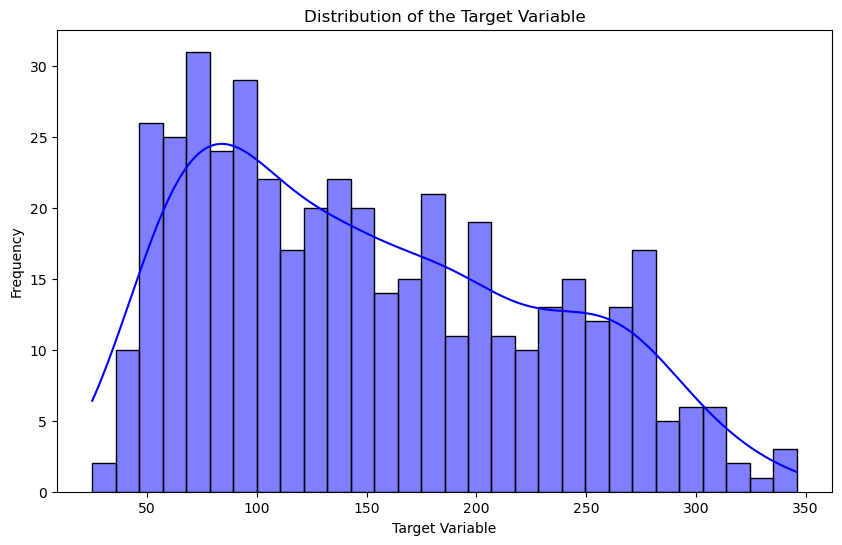

In [7]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['target'], bins=30, kde=True, color='blue')
plt.title('Distribution of the Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

The above histogram provides a visual summary, where the blue line gives a smoothed version. Provides a visual insight into the central tendency, spread, shape and helps to find skewness.

C:\Users\techv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\techv\AppData\Local\Temp\ipykernel_29532\3191399294.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


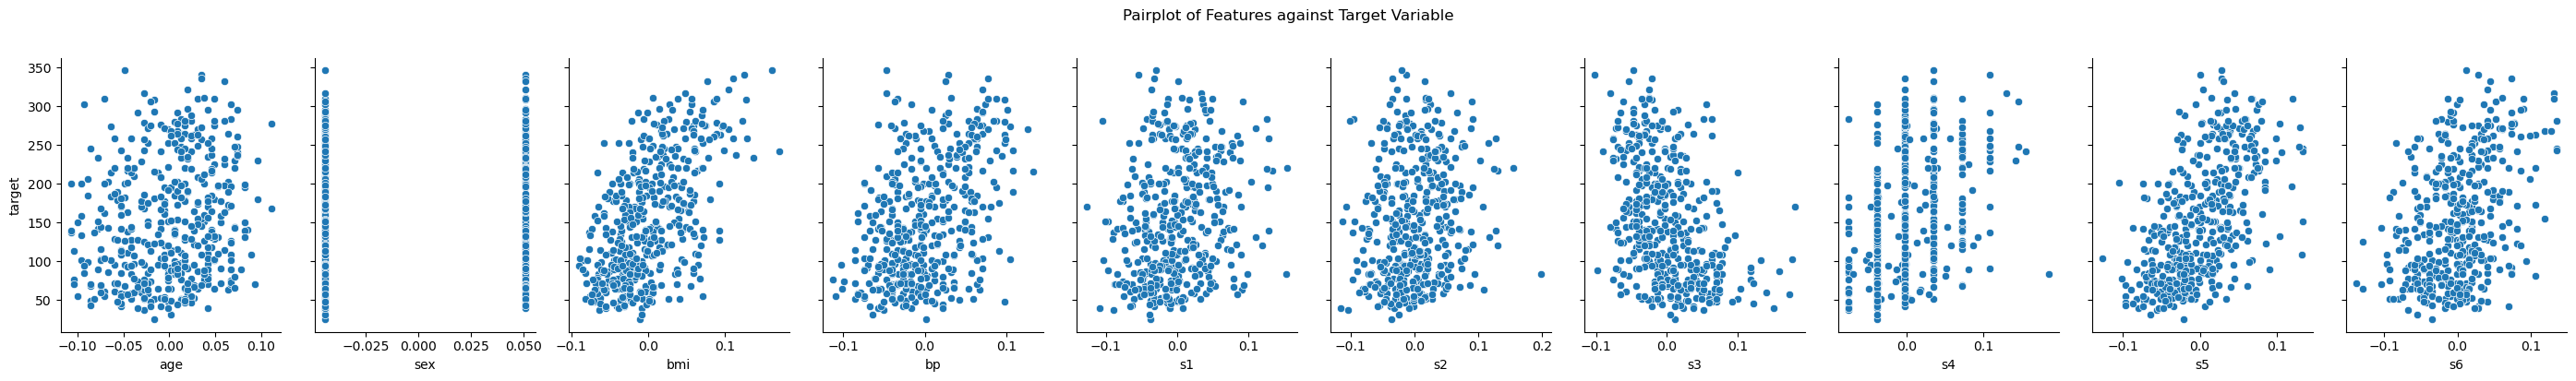

In [8]:
# Visualize relationships between features and target variable
sns.pairplot(df, x_vars=diabetes.feature_names, y_vars=['target'], height=4, aspect=0.7)
plt.suptitle('Pairplot of Features against Target Variable', y=1.02)
plt.tight_layout()
plt.show()

Each scatterplot in the pair plot represents the relationship between a specific feature and the target variable.

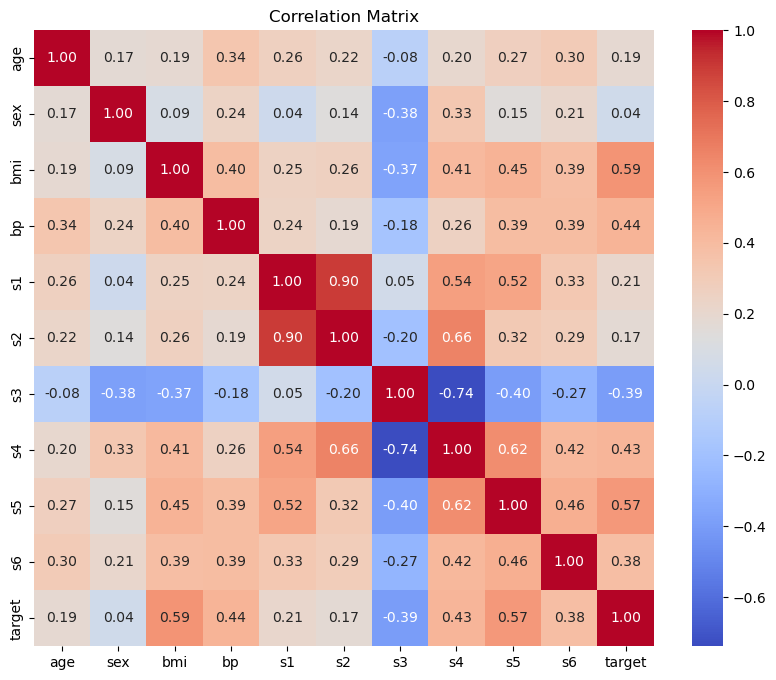

In [9]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The above graph mostly suggest that the model has mostly positive correlation among the variables, with some instances of strong negative or negative correlation between them 
For examples
1. Between S3 and S4 (Strong Negative Correlation)
2. Between age and S3 (Negative Correlation)

In [10]:
#Check for missing values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [11]:
#dropping if any missing values exist
df.dropna(inplace=True)

Since the dataset is a part of scikit-learn library, it is already clean.

In [12]:
#assign the target variable
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Print the shape of training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


In [14]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

By standardizing the data, we make sure that the feature in both training and test sets are on a comparable scale.

In [15]:
# Define scoring functions
scoring = {
    'r_squared': 'r2',
    'mae': make_scorer(mean_absolute_error),
}

In [16]:
# Initialize models
models = [
    ("Polynomial Regression (Degree 2)", PolynomialFeatures(degree=2)),
    ("Polynomial Regression (Degree 3)", PolynomialFeatures(degree=3)),
    ("Decision Tree (Max Depth 3)", DecisionTreeRegressor(max_depth=3)),
    ("Decision Tree (Max Depth 5)", DecisionTreeRegressor(max_depth=5)),
    ("kNN (k=3)", KNeighborsRegressor(n_neighbors=3)),
    ("kNN (k=5)", KNeighborsRegressor(n_neighbors=5)),
]

In [17]:
import pandas as pd 

results = pd.DataFrame(columns=['Model', 'R-Squared Mean', 'R-Squared Std', 'MAE Mean', 'MAE Std'])

for name, model in models:
    if 'Polynomial' in name:
        # For polynomial regression, transform the features
        X_train_poly = PolynomialFeatures(degree=model.degree).fit_transform(X_train_scaled)
        scores = cross_validate(LinearRegression(), X_train_poly, y_train, scoring=scoring, cv=5)
    else:
        scores = cross_validate(model, X_train_scaled, y_train, scoring=scoring, cv=5)

    result_row = {
        'Model': name,
        'R-Squared Mean': np.mean(scores['test_r_squared']),
        'R-Squared Std': np.std(scores['test_r_squared']),
        'MAE Mean': np.mean(scores['test_mae']),
        'MAE Std': np.std(scores['test_mae']),
    }
    
    # Convert the result_row to a DataFrame before appending
    result_df = pd.DataFrame([result_row])
    
    # Concatenate the result_df to the DataFrame
    results = pd.concat([results, result_df], ignore_index=True)


In [18]:
# Identify the best model based on R-Squared
best_model = results.loc[results['R-Squared Mean'].idxmax()]

# Print the results table
print("Results Table:")
print(results)

# Print the best model
print("\nBest Model:")
print(best_model)

Results Table:
                              Model  R-Squared Mean  R-Squared Std  \
0  Polynomial Regression (Degree 2)        0.300709       0.139866   
1  Polynomial Regression (Degree 3)    -1067.798576     713.197518   
2       Decision Tree (Max Depth 3)        0.280156       0.144841   
3       Decision Tree (Max Depth 5)        0.232088       0.171237   
4                         kNN (k=3)        0.242015       0.110494   
5                         kNN (k=5)        0.305324       0.108152   

     MAE Mean     MAE Std  
0   50.744877    3.617854  
1  955.544372  230.091506  
2   52.017377    3.288908  
3   52.899085    2.744378  
4   52.153830    2.674072  
5   50.622374    2.699558  

Best Model:
Model             kNN (k=5)
R-Squared Mean     0.305324
R-Squared Std      0.108152
MAE Mean          50.622374
MAE Std            2.699558
Name: 5, dtype: object


The best model is the kNN model with k=5, as it has the highest R-Squared Mean (0.305324) compared to the other models. As R-squared is used to measure the propotion of the variance. A higher R-squared value indicates a better fit.

In [19]:
# Train the best kNN model on the full training set
best_knn_model = KNeighborsRegressor(n_neighbors=5)  # Instantiate the best kNN model with k=5
best_knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [20]:
# Evaluate the best kNN model on the test set
y_pred_test_knn = best_knn_model.predict(X_test_scaled)
r2_test_knn = best_knn_model.score(X_test_scaled, y_test)
mae_test_knn = mean_absolute_error(y_test, y_pred_test_knn)
mape_test_knn = mean_absolute_percentage_error(y_test, y_pred_test_knn)

In [21]:
# Print results for the best kNN model on the test set
print("\nResults for the Best kNN Model on the Test Set:")
print(f"R-Squared: {r2_test_knn}")
print(f"MAE: {mae_test_knn}")
print(f"MAPE: {mape_test_knn}")


Results for the Best kNN Model on the Test Set:
R-Squared: 0.42480887066066253
MAE: 42.777528089887646
MAPE: 0.3622598226721086


The R-squared value on the test set (0.4248) is higher than the R-Squared Mean on the training set (0.305324). This indicates that the kNN model performs better in explaining the variance in the target variable on unseen data (test set) compared to the training set.
A lower MAE on the test set (42.7775) compared to the MAE Mean on the training set (50.6224) suggests that the model is making more accurate predictions on new, unseen data.

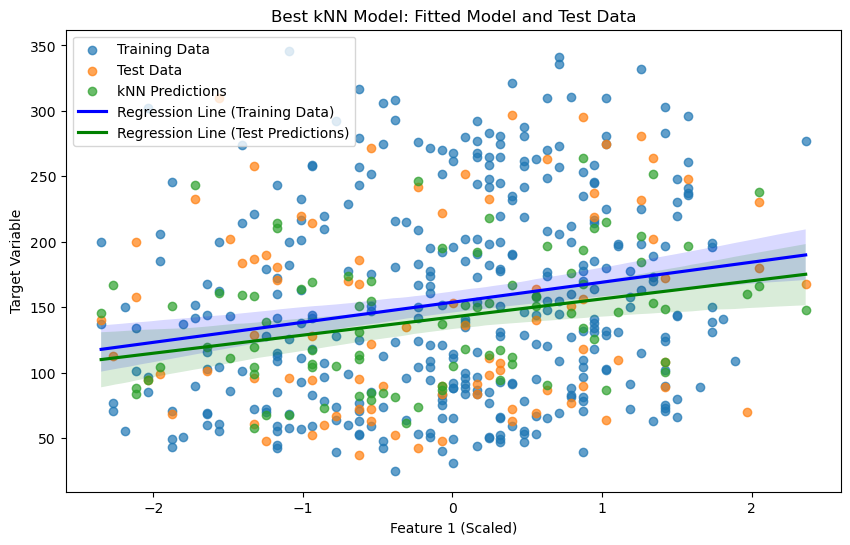

In [22]:
# Plot a graph 
plt.figure(figsize=(10, 6))

# Plot Training Data
plt.scatter(X_train_scaled[:, 0], y_train, label='Training Data', alpha=0.7)

# Plot Test Data
plt.scatter(X_test_scaled[:, 0], y_test, label='Test Data', alpha=0.7)

# Plot kNN Predictions
plt.scatter(X_test_scaled[:, 0], y_pred_test_knn, label='kNN Predictions', alpha=0.7)

# Add regression line for Training Data
sns.regplot(x=X_train_scaled[:, 0], y=y_train, scatter=False, color='blue', label='Regression Line (Training Data)')

# Add regression line for Test Data
sns.regplot(x=X_test_scaled[:, 0], y=y_pred_test_knn, scatter=False, color='green', label='Regression Line (Test Predictions)')

plt.title('Best kNN Model: Fitted Model and Test Data')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

Shown in blue, this line represents the fitted regression model based on the training data. Shown in green, this line represents the fitted regression model's predictions on the test data.

In summary, the graph provides a visual representation of how well the kNN model fits the training data and makes predictions on the test data. The regression lines help visualize the relationship between the selected feature and the target variable, allowing you to assess the model's performance visually.

#### Conclusion

The evaluation of various regression models on the diabetes dataset has provided insights into their performance. The models considered include Polynomial Regression (Degree 2 and Degree 3), Decision Tree Regression (Max Depth 3 and Max Depth 5), and k-Nearest Neighbors (k=3 and k=5).

The Polynomial Regression model with degree 3 exhibited poor performance, suggesting potential overfitting to the training data.

In conclusion, the kNN regression model with k=5 demonstrated the best overall performance in predicting the target variable in the diabetes dataset.